# Testing: Thermal Thresholds

Development of a quick-acces view into how often temperatures have been too hot for high-value species like kelp & lobster. This notebook looks at how frequently in the last decade temperatures have exceeded the preferences for these key regional species.

Working via directory at: /Users/akemberling/Library/CloudStorage/Box-Box/
Calculating extreme events over 1982-2020 reference period & using linear-detrending for years: 1982-2022


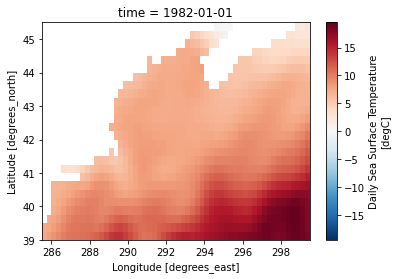

In [19]:
# Libraries
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import netCDF4
import os
import oisstools as ot
 
# Set Notebook Options:  -----------------------------------
box_root = ot.set_workspace("local")

# Set Baseline Reference Period
reference_period = "1982-2020"

# Set Start and End Year to Load
start_year = 1982
end_year = 2022

# Confirm and Report what options are selected -----------
print(f"Working via directory at: {box_root}")
print(f"Calculating extreme events over {reference_period} reference period & using linear-detrending for years: {start_year}-{end_year}")


# Load 40+ Years of sst
sst_obs = ot.load_box_oisst(
    box_root, 
    start_year, 
    end_year, 
    anomalies = False, 
    do_parallel = True)


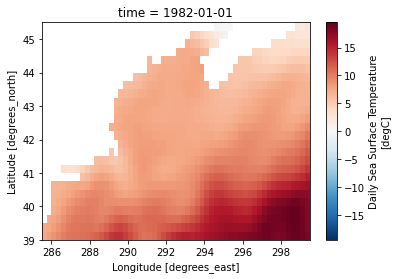

In [20]:
# Trim it down to a smaller area
# Set Bigger Gom Dimensions
gom_dims = {
    "lat_min": 39,
    "lon_min": 360 - 74.5,
    "lat_max": 45.5,
    "lon_max": 360 - 60.5}

# Filter coordinates
gom_sst = sst_obs.sel(
    lon = slice(gom_dims["lon_min"], gom_dims["lon_max"]), 
    lat = slice(gom_dims["lat_min"], gom_dims["lat_max"]))

# Load it for speed
gom_sst.load()
sst_obs.close()

# View it
gom_sst.isel(time = 0).sst.plot()

### Setting Meaningful Thresholds

Lobster, salmon, and kelp are cold-water species likely to see a reduction in their suitable habitats in New England. 

For lobster the range of temperatures they find suitable is: 6 - 15C. 
For Kelp, Chat gpt says a very similar 5-15C.
Salmon prefer temperatures that are slightly cooler at 9C

### Lobster Test: 15C

Text(0.5, 1.0, 'Lobster Test: Exceedances for 2022 with Threshold 15C')

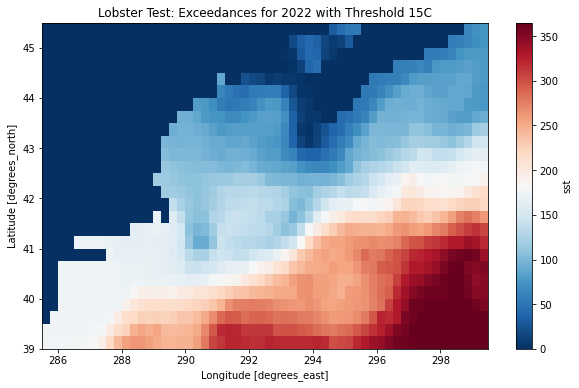

In [112]:
# Picking a threshold
thresh = 15
year_op = "2022"

# One Year check:
exceedances_over_time = (gom_sst.sel(time = year_op)["sst"] > thresh).sum(dim=['time'])

# Create plot
plot = exceedances_over_time.plot(cmap = "RdBu_r", vmin=0, vmax=365)

# Set the figure size (width, height) in inches
plot.figure.set_size_inches(10, 6)  # Adjust the dimensions as needed

# Add a title to the plot
plot.axes.set_title(f"Lobster Test: Exceedances for {year_op} with Threshold {thresh}C")

### Kelp Test: 18C

Text(0.5, 1.0, 'Kelp Test: Exceedances for 2012 with Threshold 18C')

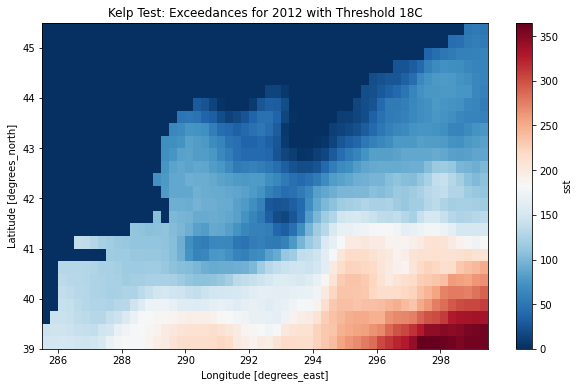

In [92]:
# Picking a threshold
thresh = 18
year_op = "2012"

# One Year check:
exceedances_over_time = (gom_sst.sel(time = year_op)["sst"] > thresh).sum(dim=['time'])

# Create plot
plot = exceedances_over_time.plot(cmap = "RdBu_r", vmin=0, vmax=365)

# Set the figure size (width, height) in inches
plot.figure.set_size_inches(10, 6)  # Adjust the dimensions as needed

# Add a title to the plot
plot.axes.set_title(f"Kelp Test: Exceedances for {year_op} with Threshold {thresh}C")


### Salmon Test: 9C

In [103]:
# Replace 'path/to/natural_earth_shapefile.shp' with the actual path to your shapefile
import geopandas as gpd
gdf = gpd.read_file(f'{box_root}RES_Data/Shapefiles/ne_10m_land/ne_10m_land.shp')

# SST coordinates are insane...
gdf = gdf['geometry'].translate(xoff=360.0)

<AxesSubplot:title={'center':'Salmon Test: Exceedances for 2012 with Threshold 9C'}, xlabel='Longitude [degrees_east]', ylabel='Latitude [degrees_north]'>

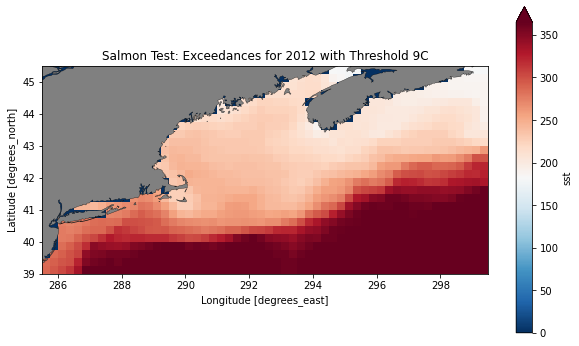

In [109]:
# Picking a threshold
thresh = 9
year_op = "2012"

# One Year check:
exceedances_over_time = (gom_sst.sel(time = year_op)["sst"] > thresh).sum(dim=['time'])

# Create plot
plot = exceedances_over_time.plot(cmap = "RdBu_r", vmin=0, vmax=365)

# Set the figure size (width, height) in inches
plot.figure.set_size_inches(10, 6)  # Adjust the dimensions as needed

# Add a title to the plot
plot.axes.set_title(f"Salmon Test: Exceedances for {year_op} with Threshold {thresh}C")

# Plot the Natural Earth shapefile for landmasses
gdf.plot(ax=plot.axes, color='gray', linewidth=0.8)
gdf.boundary.plot(ax=plot.axes, color='black', linewidth=0.3)



---
# Thinking Operationally

The above code works for one-off checks into where ocean temperatures exceed some threshold. In practice we'd likely want to measure how this is evolving in time. This could be done by looking at a rate increase in number of days per year that temperatures are over the threshold, or some other way to track the cumulative thermal stress.